# Data Science CSE558 Assignment - 2
## Ritika Thakur (2022408) | Saksham Singh (2022434)

In [24]:
from sklearn.datasets import fetch_kddcup99
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [25]:
kddcup = fetch_kddcup99(data_home="kdd_data", percent10=True, shuffle=True, random_state=42)
kddcup.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [26]:
print(kddcup.DESCR)

.. _kddcup99_dataset:

Kddcup 99 dataset
-----------------

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [2]_. The artificial data (described on the `dataset's
homepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was
generated using a closed network and hand-injected attacks to produce a
large number of different types of attack with normal activity in the
background. As the initial goal was to produce a large training set for
supervised learning algorithms, there is a large proportion (80.1%) of
abnormal data which is unrealistic in real world, and inappropriate for
unsupervised anomaly detection which aims at detecting 'abnormal' data, i.e.:

* qualitatively different from normal data
* in large minority among the observations.

We thus transform the KDD Data set into two different data sets: SA and SF.

* SA is obtained by simply selecting all

In [27]:
data = pd.DataFrame(kddcup.data, columns=kddcup.feature_names)
data[kddcup.target_names] = pd.DataFrame(kddcup.target)

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
1,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'tcp',b'http',b'SF',345,5419,0,0,0,0,...,255,1.0,0.0,0.01,0.02,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,2,0.01,0.07,0.0,0.0,1.0,1.0,0.0,0.0,b'neptune.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
494017,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,8,0.03,0.06,0.0,0.0,1.0,1.0,0.0,0.0,b'neptune.'
494018,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
494019,9141,b'udp',b'other',b'SF',147,105,0,0,0,0,...,3,0.01,0.41,0.84,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [28]:
# set data types for each col to be float except for protocol_type, service, flag, and target
data["protocol_type"] = data["protocol_type"].astype("category")
data["service"] = data["service"].astype("category")
data["flag"] = data["flag"].astype("category")
data["labels"] = data["labels"].astype("category")

for col in data.columns:
    if data[col].dtype != "category":
        data[col] = data[col].astype("float")


# encode the categorical columns
le = LabelEncoder()
data["protocol_type"] = le.fit_transform(data["protocol_type"])
data["service"] = le.fit_transform(data["service"])
data["flag"] = le.fit_transform(data["flag"])
data["labels"] = le.fit_transform(data["labels"])

data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18
1,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18
2,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18
3,0.0,1,22,9,345.0,5419.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0,11
4,0.0,1,45,5,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.01,0.07,0.00,0.00,1.0,1.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18
494017,0.0,1,45,5,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.03,0.06,0.00,0.00,1.0,1.0,0.0,0.0,9
494018,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,18
494019,9141.0,2,40,9,147.0,105.0,0.0,0.0,0.0,0.0,...,3.0,0.01,0.41,0.84,0.00,0.0,0.0,0.0,0.0,11


In [29]:
n = data.shape[0]
print(f"Number of samples: {n}")
d = len(kddcup.feature_names)
print(f"Number of features: {d}")

Number of samples: 494021
Number of features: 41


In [30]:
D = data.drop(columns=["labels"])
D

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
1,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
2,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
3,0.0,1,22,9,345.0,5419.0,0.0,0.0,0.0,0.0,...,101.0,255.0,1.00,0.00,0.01,0.02,0.0,0.0,0.0,0.0
4,0.0,1,45,5,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,2.0,0.01,0.07,0.00,0.00,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
494017,0.0,1,45,5,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,8.0,0.03,0.06,0.00,0.00,1.0,1.0,0.0,0.0
494018,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
494019,9141.0,2,40,9,147.0,105.0,0.0,0.0,0.0,0.0,...,255.0,3.0,0.01,0.41,0.84,0.00,0.0,0.0,0.0,0.0


In [31]:
D.shape

(494021, 41)

JL Matrix M defined as:\
$ M = np.random.normal(0, 1/np.sqrt(20), (d, 20)) $\
where d = 41 (the number of features)

The matrix M is of shape (41, 20) and the values are drawn from a normal distribution with mean 0 and standard deviation 1/sqrt(20).

In [32]:
def compute_loss(data, centroids, labels):
    cent = centroids[labels]
    return mse(data, cent)

In [33]:
clusters = 15
results = {'Trial': [], 'Loss on D': [], 'Loss on E': []}

for trial in range(1, 6):
    M = np.random.normal(0, 1/np.sqrt(20), (d, 20))
    E = np.dot(D, M)

    # print(E.shape)

    kmeans_D = KMeans(n_clusters=clusters, random_state=trial).fit(D)
    kmeans_E = KMeans(n_clusters=clusters, random_state=trial).fit(E)

    A = kmeans_E.cluster_centers_
    B = kmeans_D.cluster_centers_

    # print(A.shape)
    # print(B.shape)

    labels_D = kmeans_D.labels_
    labels_E = kmeans_E.labels_

    loss_D = compute_loss(D, B, labels_D)
    loss_E = compute_loss(E, A, labels_E)

    results['Trial'].append(trial)
    results['Loss on D'].append(loss_D)
    results['Loss on E'].append(loss_E)

trials = np.array(results['Trial'])
loss_D = np.array(results['Loss on D'])
loss_E = np.array(results['Loss on E'])

In [34]:
print(results)

{'Trial': [1, 2, 3, 4, 5], 'Loss on D': [172720.7227475595, 159364.01227183943, 159557.48023108335, 165759.93711970482, 185007.71927363874], 'Loss on E': [280277.82782336394, 382375.44749523065, 252947.24390146983, 268830.0281370352, 326603.1743420673]}


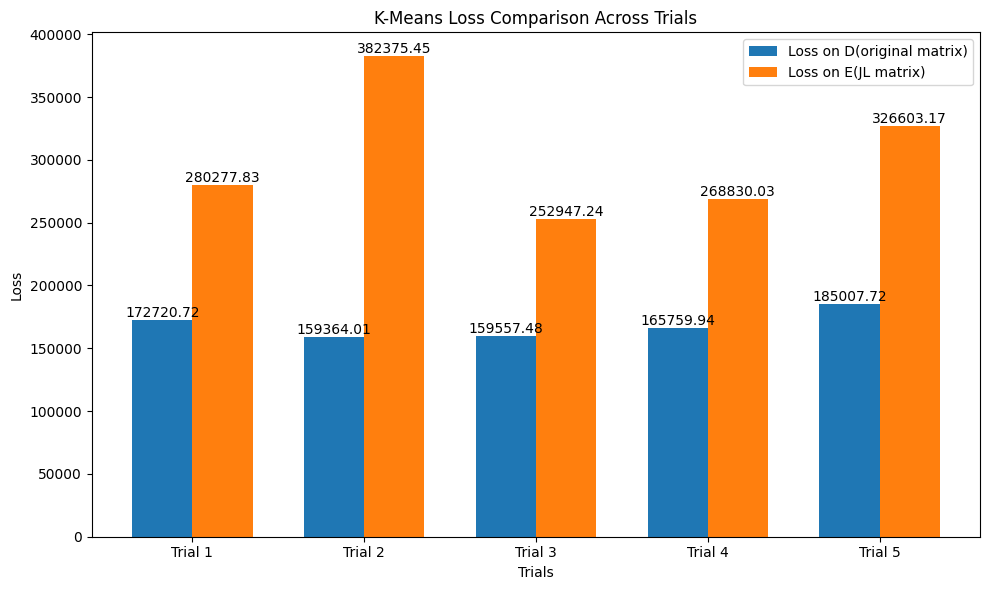

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # Width of bars
x = np.arange(len(trials))

# Plot bars
bars_D = ax.bar(x - width / 2, loss_D, width, label='Loss on D(original matrix)')
bars_E = ax.bar(x + width / 2, loss_E, width, label='Loss on E(JL matrix)')

# Add values on top of each bar
for bar in bars_E:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

for bar in bars_D:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Set labels and title
ax.set_xlabel('Trials')
ax.set_ylabel('Loss')
ax.set_title('K-Means Loss Comparison Across Trials')
ax.set_xticks(x)
ax.set_xticklabels([f'Trial {i}' for i in trials])
ax.legend()

plt.tight_layout()
plt.show()


We see that the mean squared loss for K-means clustering is lesser for the original data matrix than for our JL matrix. 
This is because:
- K-means clustering tries to minimize intra-cluster distances. The JL transformation preserves the global geometry but can distort the local structure, which is crucial for clustering.
- Clustering relies heavily on exact distances between points. While JL matrices approximately preserve distances, small distortions can cause points that were previously close to be slightly farther apart (or vice versa). This can result in suboptimal cluster assignments and higher loss.
- Since JL matrices introduce random perturbations, they affect k-means performance more than linear regression, where the target variable anchors the model.

Sparse JL Matrix M defined as:\
$ np.random.choice([0, -1, 1], size=(10 * d, n), p=[1 - 2 * density, density, density]) $\
where d = 41 (the number of features), n = number of samples and $ density =  1 / np.sqrt(d) $

The sparse JL matrix is of shape (410, 494021) and the matrix is sparse with $ 1/np.sqrt(d) $ density. 

In [36]:
def sparse_jl_matrix(d, n):
    density = 1 / np.sqrt(d)
    return np.random.choice([0, -1, 1], size=(10 * d, n), p=[1 - 2 * density, density, density])

In [37]:
trials = 5
results2 = {'Trial': [], 'Loss with a': [], 'Loss with b': []}

n, d = D.shape  # Data dimensions
y = data['labels']

for trial in range(1, trials + 1):
    M = sparse_jl_matrix(d, n)

    E = np.dot(M, D)
    z = np.dot(M, y)

    # Linear Regression on (E, z)
    model_E = LinearRegression().fit(E, z)
    a = model_E.coef_

    # Linear Regression on (D, y)
    model_D = LinearRegression().fit(D, y)
    b = model_D.coef_

    # Compute loss on (D, y)
    pred_a = np.dot(D, a.T)
    pred_b = np.dot(D, b.T)

    loss_a = mse(y, pred_a)
    loss_b = mse(y, pred_b)

    # Store results
    results2['Trial'].append(trial)
    results2['Loss with a'].append(loss_a)
    results2['Loss with b'].append(loss_b)

results_df = pd.DataFrame(results2)

In [38]:
print(y.shape)

(494021,)


In [39]:
results_df

,Trial,Loss with a,Loss with b
0,1,1.024721,58.479884
1,2,0.905955,58.479884
2,3,0.938673,58.479884
3,4,0.986424,58.479884
4,5,0.953255,58.479884


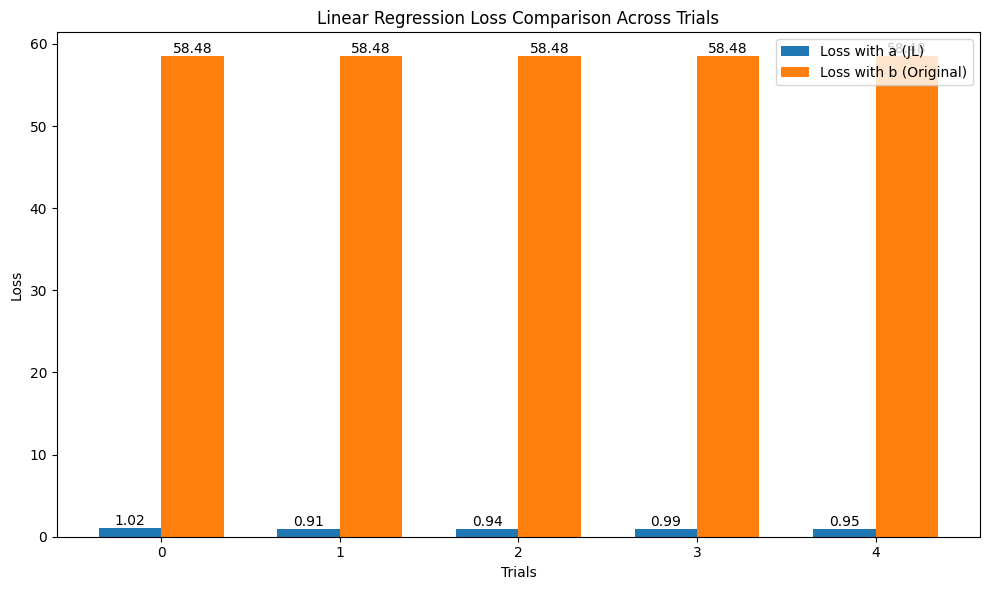

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = np.arange(len(results_df))

ax.bar(x - width / 2, results_df['Loss with a'], width, label='Loss with a (JL)')
ax.bar(x + width / 2, results_df['Loss with b'], width, label='Loss with b (Original)')

# Add values on top of bars
for idx, val in enumerate(results_df['Loss with a']):
    ax.text(idx - width / 2, val + 0.01, f'{val:.2f}', ha='center', va='bottom')

for idx, val in enumerate(results_df['Loss with b']):
    ax.text(idx + width / 2, val + 0.01, f'{val:.2f}', ha='center', va='bottom')

ax.set_xlabel('Trials')
ax.set_ylabel('Loss')
ax.set_title('Linear Regression Loss Comparison Across Trials')
ax.set_xticks(x)
# ax.set_xticklabels([f'Trial {i}' for i in results['Trial']])
ax.legend()

plt.tight_layout()
plt.show()

We see that the mean squared loss for Linear Regression is significantly lesser for the sparse JL matrix than for the original data matrix.\
This is because:
- Linear regression minimizes the sum of squared errors between the predicted and actual responses. When using a sparse JL matrix, the dimensionality of the data is reduced, and random projections tend to preserve the pairwise distances and overall structure of the data as per the Johnson-Lindenstrauss lemma.
- Sparse JL matrices introduce controlled random sparsity, which often retains enough information for linear regression to work well without overfitting, especially in high-dimensional data.
- The reduced dimensions may result in better generalization by eliminating irrelevant or noisy features that might contribute to higher loss in the original high-dimensional data.